**NAME - PREETAM JOSHI**

**DATA SCIENCE & BUSSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION**

![PICTURE](https://drive.google.com/uc?id=19wdIBbRe0jRgmgR1f3-euoPggk_tLnDH)

# **GRIP NOVEMBER22**

**DATASET : http://bit.ly/w-data**

**PREDICTION USING SUPERVISED ML**

Use ML models to predict percentage of an student based on his study hours.

In [ ]:
# import required librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import ml library
import sklearn

In [ ]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the data set
url = 'http://bit.ly/w-data'

# read data from url
data = pd.read_csv(url)

In [ ]:
# first 5 data points
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Explore the data set**

In [ ]:
# shape of the data
data.shape

(25, 2)

In [ ]:
# statistical summary
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


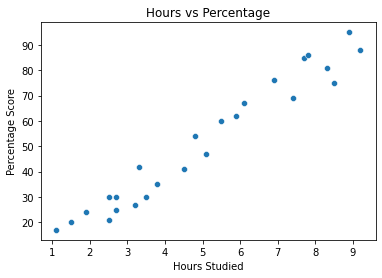

In [ ]:
# make scatter plot
sns.scatterplot(data=data, x= data['Hours'], y = data['Scores'])

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

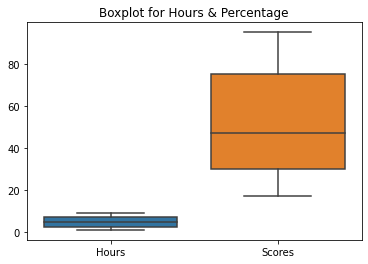

In [ ]:
sns.boxplot(data=data)

plt.title('Boxplot for Hours & Percentage')  
  
plt.show()

No outliers in our Data Set.

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

There are neither missing value nor any duplicate value in our data set.

# **Model Building**

##**Linear Regression Model**


### **Prepareing the Data**
We need to divide the data into Inputs(features) and Outputs(lables).

In [ ]:
# X is input and Y is output
X = data[['Hours']]
y = data[['Scores']]

In [ ]:
# spilt the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [ ]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20, 1), (5, 1), (5, 1))

In [ ]:
# Import linear regression object
from sklearn.linear_model import LinearRegression

In [ ]:
# Create Linear Regression object 
lr = LinearRegression()

In [ ]:
# fitting the model on X_train and y_train
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# find intercept and coef
intercept = lr.intercept_
coef = lr.coef_
print("Intercept is : ", intercept," and coef is :",coef )

Intercept is :  [2.01816004]  and coef is : [[9.91065648]]


In [ ]:
# Print regression equation
print('Linear Equation is : ', 'Scores=',coef,'x Hours + ',intercept)

Linear Equation is :  Scores= [[9.91065648]] x Hours +  [2.01816004]


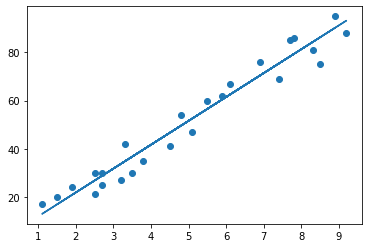

In [ ]:
# Plotting the regression line
line = coef*X+intercept

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### **Making Prediction**

In [ ]:
# making prediction on validation set
yhat = lr.predict(X_test)

In [ ]:
yhat

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
b = list(y_test.values)
b

[array([20]), array([27]), array([69]), array([30]), array([62])]

In [ ]:
a = list(yhat)
a

[array([16.88414476]),
 array([33.73226078]),
 array([75.357018]),
 array([26.79480124]),
 array([60.49103328])]

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': b, 'Predicted': a})  
df 

,Actual,Predicted
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


# **How accurate our model is?**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2 = r2_score(y_test,yhat)
mae = mean_absolute_error(y_test,yhat)
print(r2," & ",mae)

0.9454906892105354  &  4.183859899002982


Since we got the value of r-squred is almost 94%. and we know that how high the value of r2, that accurate our model is.

 **Question : What will be predicted score if a student studies for 9.25hr/Day?**

In [ ]:
hours = np.array([9.25]).reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


 **Answer : So if a student is studying for 9.25hr/Day. Most likely student will score around 93.69% in his exams.** 